# Data Exploration

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as tkr
%matplotlib inline
plt.style.use('ggplot')

### Functions

In [2]:
def create_pairplot(data, variables, hue, size, kind, title):
    plot = sns.pairplot(data, hue=hue, size=size, vars=variables, kind=kind)
    sns.set_style("darkgrid")
    # alter size of points in the scatterplot
    plot = plot.map_offdiag(plt.scatter, s=30, alpha=0.4)
    # visual adjustments
    sns.despine()
    plt.subplots_adjust(top=0.9)
    plot.fig.suptitle(title, fontsize=15)
    return plot

### Load data

In [3]:
df = pd.read_csv('data/complete_data.csv')
df.dropna(axis=0, how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 339
Data columns (total 20 columns):
FINAL_POSITION               333 non-null int64
TEAM                         333 non-null object
FINAL_POINTS                 333 non-null int64
SEASON                       333 non-null object
WAGE                         333 non-null float64
WAGE_SCALED                  333 non-null float64
NET_TRANSFER_SPEND           333 non-null float64
NET_TRANSFER_SPEND_SCALED    333 non-null float64
SQUAD_SIZE                   333 non-null int64
AVG_AGE                      333 non-null float64
NUM_FOREIGN_PLAYERS          333 non-null int64
TEAM_MARKET_VALUE            333 non-null float64
IS_ESTIMATED_MARKET_VAL      333 non-null float64
TEAM_MARKET_VALUE_SCALED     333 non-null float64
AVG_TIME                     333 non-null float64
NUM_TRANSFERS_IN             333 non-null int64
NUM_TRANSFERS_OUT            333 non-null int64
STADIUM_CAPACITY_SCALED      333 non-null float64
YEARS_IN_

In [4]:
df.columns = ['Final position','Team','Final points','Season','Wage','Wage scaled','Net transfer spend',
             'Net transfer spend scaled','Squad size','Avg age','Num foreign players', 'Team market value',
             'Is estimated market val','Team market value scaled','Avg time','Num transfers in',
             'Num transfers out','Stadium capacity scaled','Years in league', 'Big six']
df.head()

,Final position,Team,Final points,Season,Wage,Wage scaled,Net transfer spend,Net transfer spend scaled,Squad size,Avg age,Num foreign players,Team market value,Is estimated market val,Team market value scaled,Avg time,Num transfers in,Num transfers out,Stadium capacity scaled,Years in league,Big six
0,1,Manchester United,80,2000-01,50000000.0,1.832770,1820000.0,0.130414,34,24.9,18,170072000.0,1.0,1.381676,4.5,1,8,6.350441,9,1
1,2,Arsenal,70,2000-01,41000000.0,1.077580,-5175000.0,-0.370820,33,25.3,22,109338000.0,1.0,0.888269,4.1,8,12,3.175220,9,1
2,3,Liverpool,69,2000-01,49000000.0,1.748860,17870000.0,1.280492,30,24.5,21,139748000.0,1.0,1.135322,2.4,10,10,4.595714,9,1
3,4,Leeds United,68,2000-01,43000000.0,1.245400,41025000.0,2.939685,36,22.5,22,104249000.0,1.0,0.846926,2.9,8,8,3.091662,9,0
4,5,Ipswich Town,66,2000-01,18000000.0,-0.852348,5100000.0,0.365445,27,24.8,11,19354000.0,1.0,0.157233,2.3,6,7,2.506753,1,0


### Drop unnecessary columns

I'm going to remove the unscaled data and estimated market value indicator.

In [5]:
df.drop(['Wage','Net transfer spend','Is estimated market val','Team market value'], axis=1, inplace=True)

In [6]:
df.head()

,Final position,Team,Final points,Season,Wage scaled,Net transfer spend scaled,Squad size,Avg age,Num foreign players,Team market value scaled,Avg time,Num transfers in,Num transfers out,Stadium capacity scaled,Years in league,Big six
0,1,Manchester United,80,2000-01,1.832770,0.130414,34,24.9,18,1.381676,4.5,1,8,6.350441,9,1
1,2,Arsenal,70,2000-01,1.077580,-0.370820,33,25.3,22,0.888269,4.1,8,12,3.175220,9,1
2,3,Liverpool,69,2000-01,1.748860,1.280492,30,24.5,21,1.135322,2.4,10,10,4.595714,9,1
3,4,Leeds United,68,2000-01,1.245400,2.939685,36,22.5,22,0.846926,2.9,8,8,3.091662,9,0
4,5,Ipswich Town,66,2000-01,-0.852348,0.365445,27,24.8,11,0.157233,2.3,6,7,2.506753,1,0


### Visualization of data

#### Points - the target

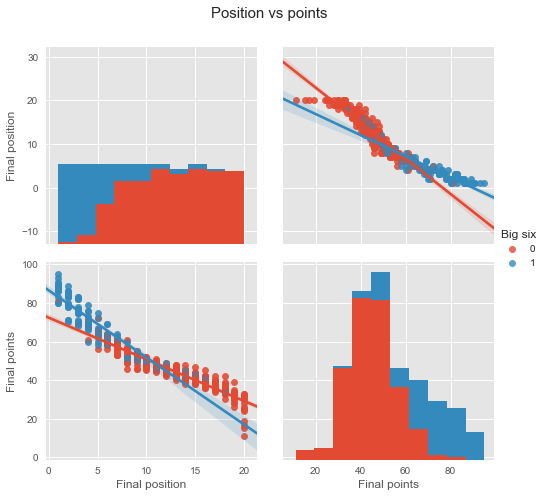

In [7]:
create_pairplot(df, ['Final position', 'Final points'], 'Big six', 3.5, 'reg', 'Position vs points')

Interestingly, the number of points teams have historically accumulated hasn't followed an exactly linear relationship. A simple linear model is likely to overstate the really poor performers, while also understating the teams challenging for the top.  

There's a different relationship at different points in the table. At the top, the big six seem to be operating in their own mini-league. Around mid table the curve flattens somewhat, then steepens again for the relegation battlers.

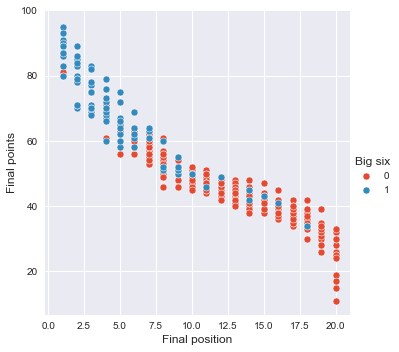

In [8]:
sns.pairplot(data=df, x_vars=['Final position'],
             y_vars=['Final points'], hue='Big six', size=5)

Here's a closer look at the points vs position relationship. There's quite a high variation in the number of points the team that finishes bottom accumulates. Around mid table, the line flattens somewhat, while the closer teams get towards the top of the table, the gradient begins to climb (from about position 7 upwards).  
  
This chart also highlights why managers always talk about the fabled '40 points' - only once in the past 15 years has a team managed to accumulate more than 40 points and be relegated.

In [9]:
df['Log final points'] = np.log(df['Final points'])

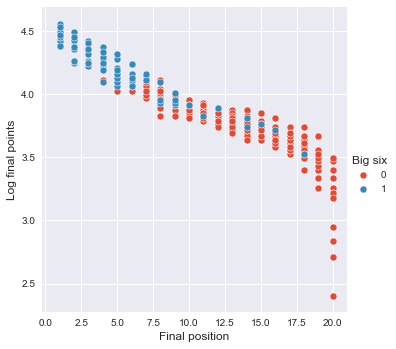

In [10]:
sns.pairplot(data=df, x_vars=['Final position'],
             y_vars=['Log final points'], hue='Big six', size=5)

If I take a log of the final points, it flattens the gradient somewhat for the top half of the table, but really accentuates the high variance at the bottom of the table. These really are outliers though - when teams have performed spectacularly poorly.

#### Wages

Start off by looking at the wages data and plotting it against final points accumulated over the course of a season.

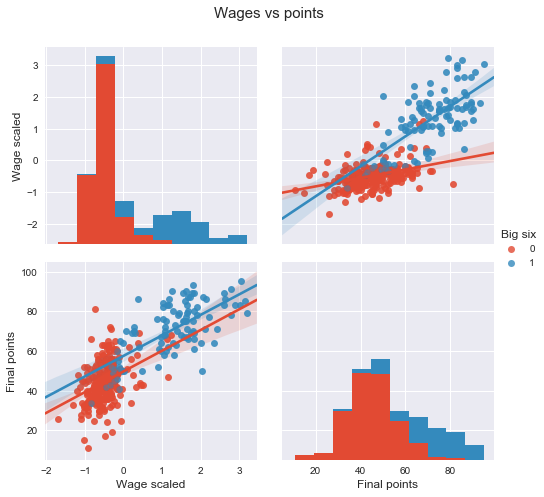

In [11]:
create_pairplot(df, ['Wage scaled', 'Final points'], 'Big six', 3.5, 'reg', 'Wages vs points')

Looks like a fairly linear relationship between (scaled) wages and number of points. The green dots represent the teams from the 'big six' teams and the blue dots are the all the other teams. Clearly, there is a separation between the spending power of the big six and the other teams, but the linear relationship is the same for both.

Wages vs stadium capacity:

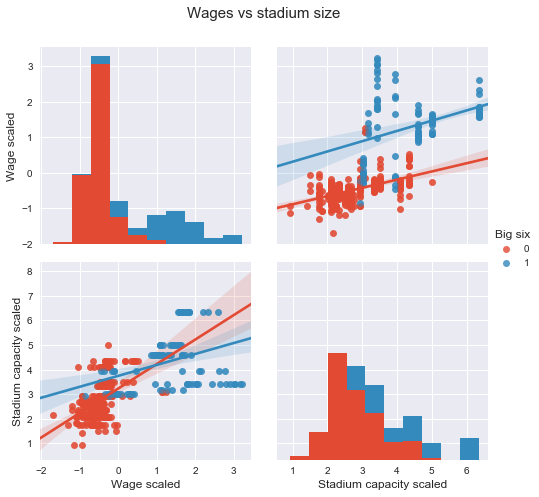

In [12]:
create_pairplot(df, ['Wage scaled', 'Stadium capacity scaled'], 'Big six', 3.5, 'reg', 'Wages vs stadium size')

That's quite interesting and intuitive - the teams with the bigger stadiums pay the higher wages.

The relationship appears to be stronger between the teams outside of the big six. The big six teams also have the biggest stadiums.

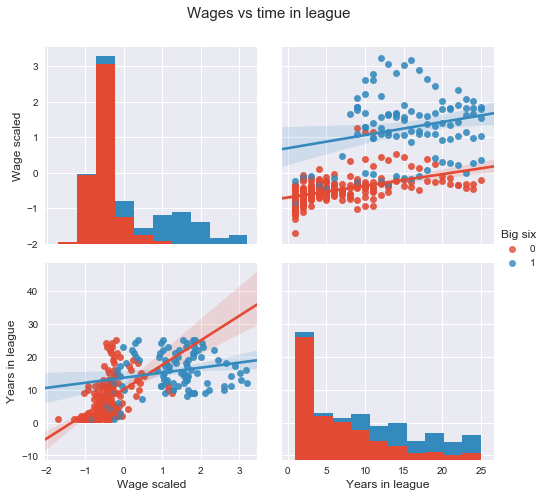

In [13]:
create_pairplot(df, ['Wage scaled', 'Years in league'], 'Big six', 3.5, 'reg', 'Wages vs time in league')

So it would seem that even teams that have been in the Premier League for 20 years, their spending on player wages seldom matches that of the big six teams.

Again, the relationship is in the same direction for both big six and other teams, but there's a stronger relationship for the smaller teams with wages paid and time spent in the division (the big six pay crazy money and have been in the PL for many years).

#### Net transfer spend

What about the net transfer spend data...

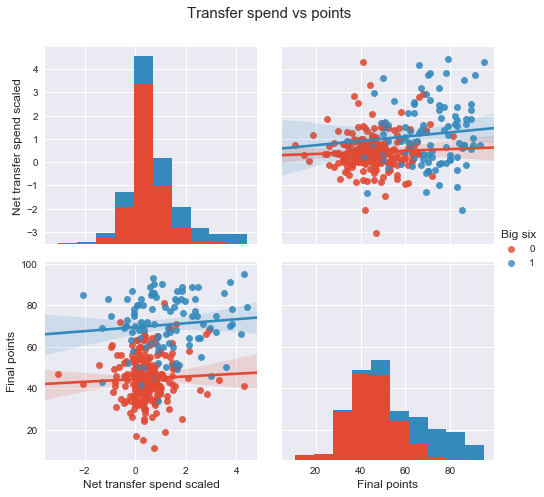

In [14]:
create_pairplot(df, ['Net transfer spend scaled', 'Final points'], 'Big six', 3.5, 'reg', 'Transfer spend vs points')

Hmm... looks like there isn't much in the way of a relationship here, apart from the fact that the big six teams outspend the rest. What about by season?

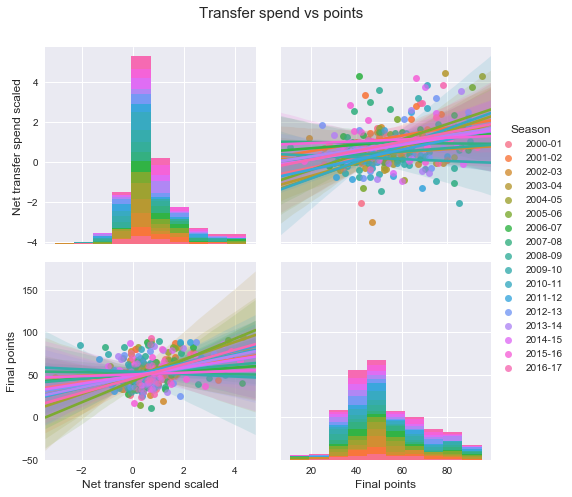

In [15]:
create_pairplot(df, ['Net transfer spend scaled', 'Final points'], 'Season', 3.5, 'reg', 'Transfer spend vs points')

Psychedelic!! No clear relationship from that! Years in league?

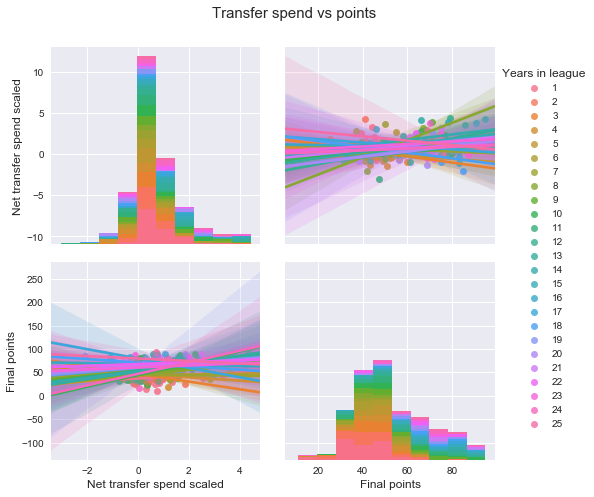

In [16]:
create_pairplot(df, ['Net transfer spend scaled', 'Final points'], 
                'Years in league', 3.5, 'reg', 'Transfer spend vs points')

These last two charts are just too busy to glean any information from them.

Net transfer spend vs Stadium capacity:

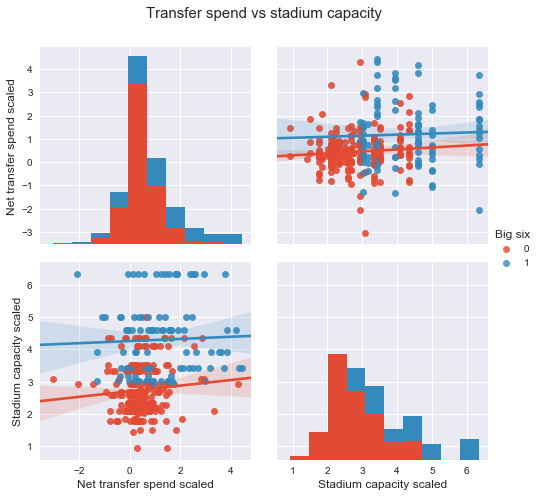

In [17]:
create_pairplot(df, ['Net transfer spend scaled', 'Stadium capacity scaled'], 
                'Big six', 3.5, 'reg', 'Transfer spend vs stadium capacity')

There doesn't appear to be much in the way of predictive power from the net transfer spend data. Perhaps I shouldn't have calculated a net figure and kept total spent and total received as 2 separate measures.

#### Squad sizes

Squad size vs final points:

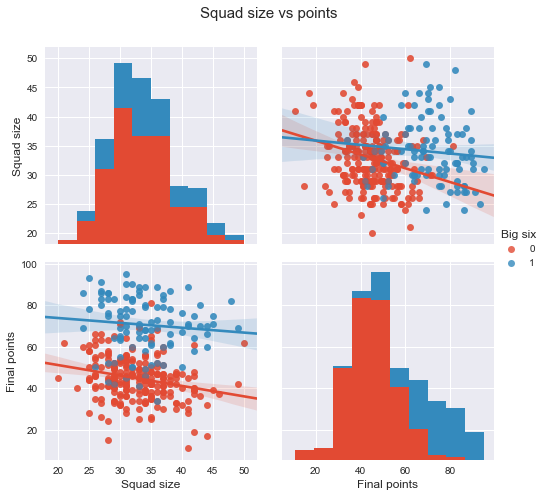

In [18]:
create_pairplot(df, ['Squad size', 'Final points'], 
                'Big six', 3.5, 'reg', 'Squad size vs points')

Squad size vs number of foreign players:

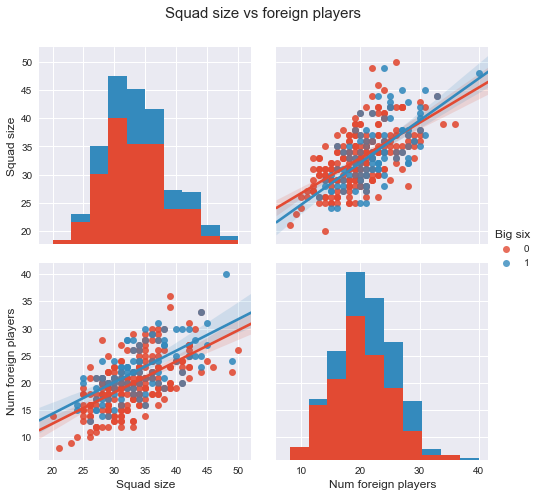

In [19]:
create_pairplot(df, ['Squad size', 'Num foreign players'], 
                'Big six', 3.5, 'reg', 'Squad size vs foreign players')

Not that surprising that there's a relationship between squad size and the number of foreign players in the squad. The Premier League is a very international division.  
  
No difference here between the bix six and rest - all teams fill their squads with international players.  
  
What is the dot in the upper right on the bottom left chart?

In [20]:
df[df['Squad size'] >= 45][['Team','Squad size','Num foreign players',
                           'Season']].sort_values('Num foreign players', ascending=False).head()

,Team,Squad size,Num foreign players,Season
262,Chelsea,48,40,2013-14
182,Arsenal,45,31,2009-10
202,Manchester City,45,27,2010-11
306,West Ham United,50,26,2015-16
218,Blackpool,45,24,2010-11


Wow - only 8 domestic players in the entire Chelsea squad in the 2013-14 season!  
  
Who are the other teams with large squads and only roughly half their players made up of foreign nationals?

In [21]:
df[df['Squad size'] >= 45][['Team','Squad size','Num foreign players',
                           'Season']].sort_values('Num foreign players', ascending=True).head()

,Team,Squad size,Num foreign players,Season
315,Bournemouth,49,22,2015-16
236,QPR,46,23,2011-12
218,Blackpool,45,24,2010-11
223,Tottenham Hotspur,49,24,2011-12
306,West Ham United,50,26,2015-16


#### Average age

What about the average age of the squad?

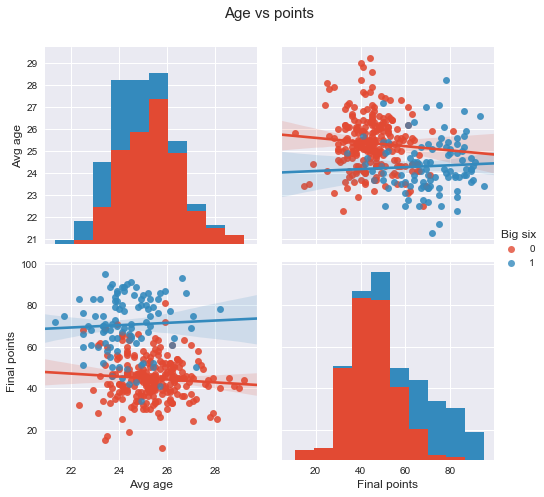

In [22]:
create_pairplot(df, ['Avg age', 'Final points'], 'Big six', 3.5, 'reg', 'Age vs points')

OK, so there's a slight negative correlation between average age and number of points accumulated.

Average age vs number of foreign players:

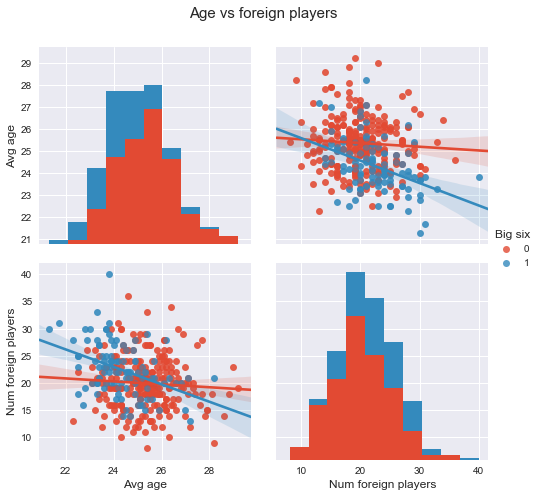

In [23]:
create_pairplot(df, ['Avg age', 'Num foreign players'], 'Big six', 3.5, 'reg', 'Age vs foreign players')

Average age vs squad size:

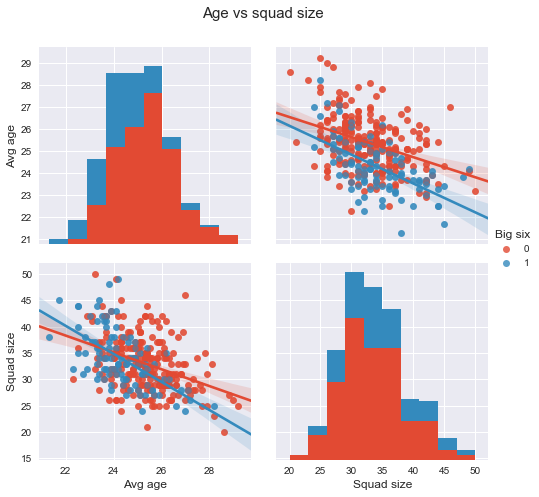

In [24]:
create_pairplot(df, ['Avg age', 'Squad size'], 'Big six', 3.5, 'reg', 'Age vs squad size')

Maybe a negative skew towards larger squads with younger ages - I guess the data includes youth players or teams with sizeable youth academy players progressing through the ranks.

#### Market values

Market value of team vs final points:

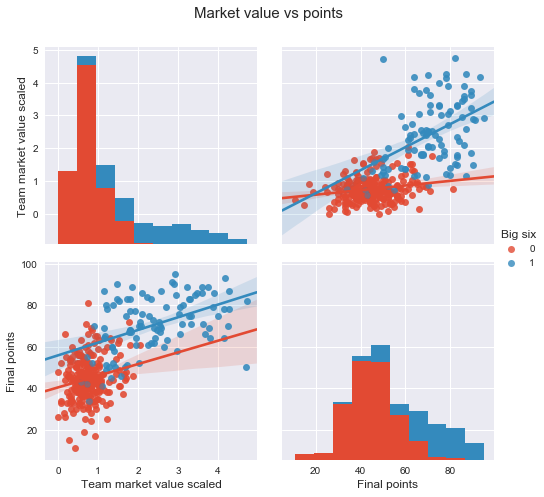

In [25]:
create_pairplot(df, ['Team market value scaled', 'Final points'], 'Big six', 3.5, 'reg', 'Market value vs points')

Like with the wages data, there's a clear difference between team market values for the big six teams and the others, with 2 clusters of data points. I would assume that transfermarkt team value data is based on the values of the players in their squads, so it's no surprise really that the teams with the most money, spend the most on players, and therefore have the most valuable squads.  
  
There appears to be a point at which the value of the team no longer has an impact on the number of points the team accumulates. But as there is always a maximum number of points available each season, there is an obvious limit. What it does show, though, is that the teams spending silly money might not be getting a decent return on that investment.

Team market value vs years in league:

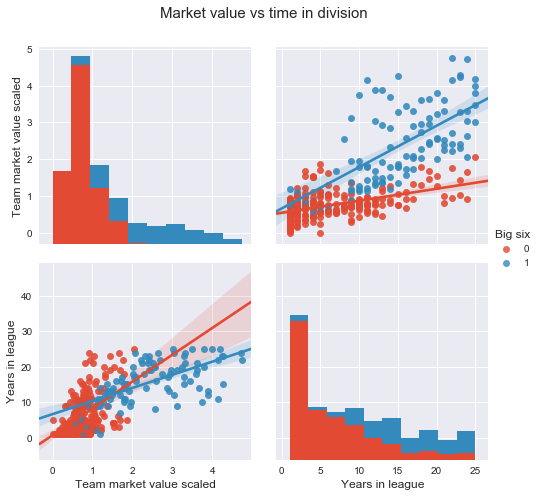

In [26]:
create_pairplot(df, ['Team market value scaled', 'Years in league'], 'Big six', 
                3.5, 'reg', 'Market value vs time in division')

#### Team cohesion

What about the average number of years a squad has been together?

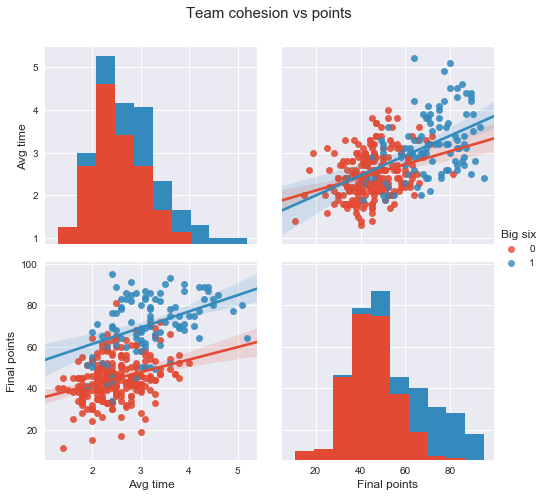

In [27]:
create_pairplot(df, ['Avg time', 'Final points'], 'Big six', 3.5, 'reg', 'Team cohesion vs points')

There's a slight positive correlatiom between the amount of time a squad has been together and the amount of points they accumulated - I guess that highlights that making too many changes all can have a detrimental impact on the team.

Average time vs number of years in the Premier League:

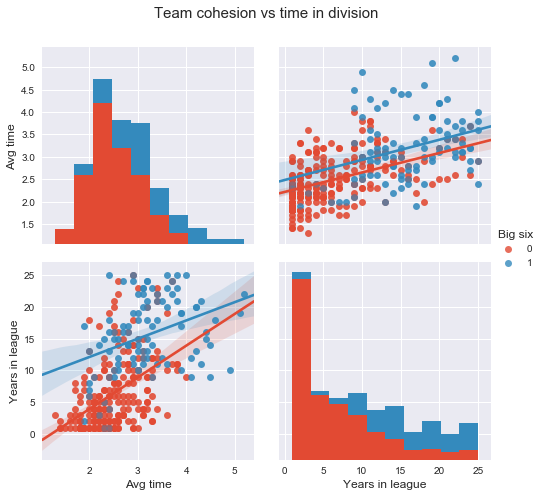

In [28]:
create_pairplot(df, ['Avg time', 'Years in league'], 'Big six', 3.5, 'reg', 'Team cohesion vs time in division')

The longer a team is in the league, the longer the squad stays together, which is fairly intuitive. One casual observation springs to mind - often when teams get relegated, the better players want to jump ship to join another Premier League team, and you tend to see lower-end Premier League players hopping from relegation struggler to relegation struggler - so I guess they're happy to stick around...while the team is in the Premier League. I would hazard a guess that this is why the relationship appears stronger for the teams outside of the big six.

#### Transfer market activity

For this I'm actually going to create a 'squad turnover' column that sums the number of players in and number of players out.

In [29]:
df['Squad turnover'] = df['Num transfers in'] + df['Num transfers out']
df.head()

,Final position,Team,Final points,Season,Wage scaled,Net transfer spend scaled,Squad size,Avg age,Num foreign players,Team market value scaled,Avg time,Num transfers in,Num transfers out,Stadium capacity scaled,Years in league,Big six,Log final points,Squad turnover
0,1,Manchester United,80,2000-01,1.832770,0.130414,34,24.9,18,1.381676,4.5,1,8,6.350441,9,1,4.382027,9
1,2,Arsenal,70,2000-01,1.077580,-0.370820,33,25.3,22,0.888269,4.1,8,12,3.175220,9,1,4.248495,20
2,3,Liverpool,69,2000-01,1.748860,1.280492,30,24.5,21,1.135322,2.4,10,10,4.595714,9,1,4.234107,20
3,4,Leeds United,68,2000-01,1.245400,2.939685,36,22.5,22,0.846926,2.9,8,8,3.091662,9,0,4.219508,16
4,5,Ipswich Town,66,2000-01,-0.852348,0.365445,27,24.8,11,0.157233,2.3,6,7,2.506753,1,0,4.189655,13


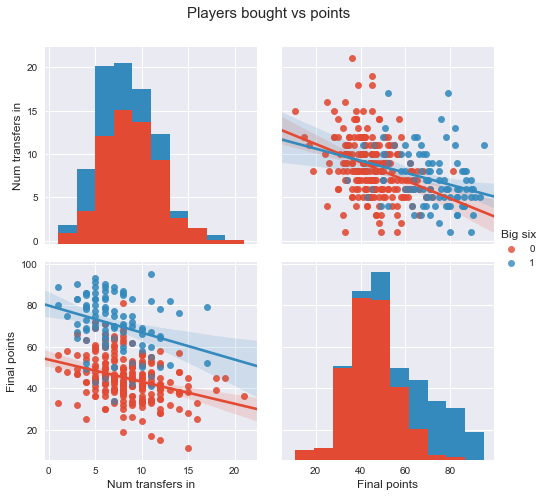

In [30]:
create_pairplot(df, ['Num transfers in', 'Final points'], 'Big six', 3.5, 'reg', 'Players bought vs points')

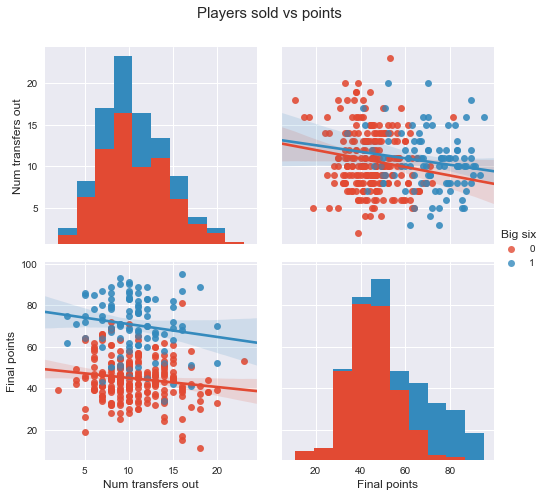

In [31]:
create_pairplot(df, ['Num transfers out', 'Final points'], 'Big six', 3.5, 'reg', 'Players sold vs points')

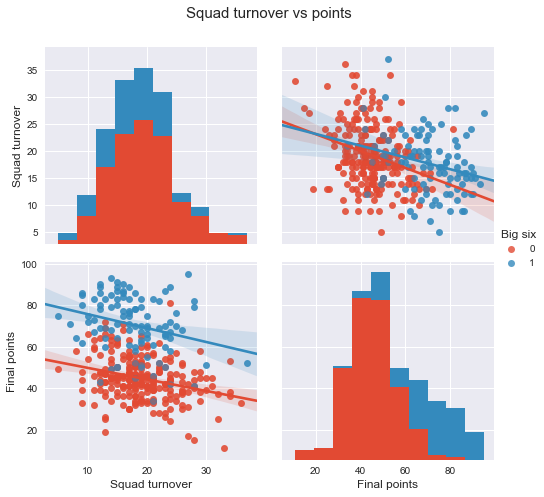

In [32]:
create_pairplot(df, ['Squad turnover', 'Final points'], 'Big six', 3.5, 'reg', 'Squad turnover vs points')

It would seem from looking at the three charts that the relationship is more related to the number of players signed rather than total squad turnover or players leaving.

#### Stadium capacity

Stadium capacity vs final points:

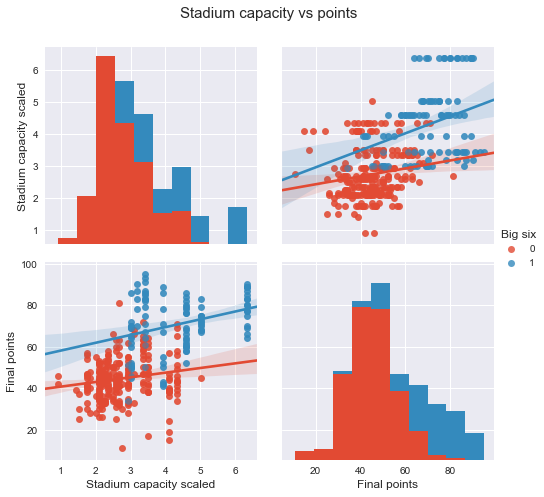

In [33]:
create_pairplot(df, ['Stadium capacity scaled', 'Final points'], 'Big six', 3.5, 'reg', 'Stadium capacity vs points')

#### Number of years in the league

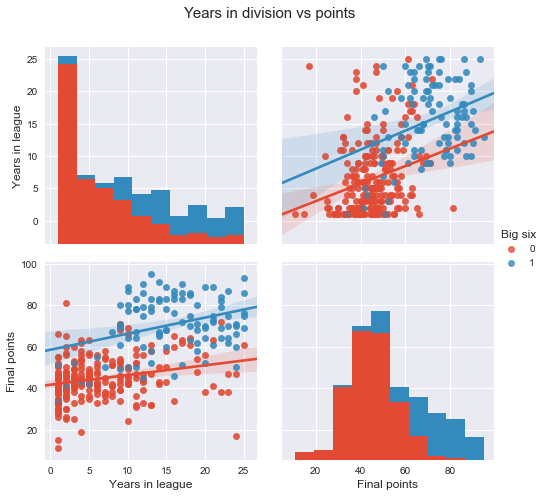

In [34]:
create_pairplot(df, ['Years in league', 'Final points'], 'Big six', 3.5, 'reg', 'Years in division vs points')

The histogram at the top left really shows that teams in their first year or two really struggle, and there are a lot of teams that only last a season or two before dropping down to the Championship.  
  
The final points histograms show that the big six teams histogram is skewed further to the right and these teams tend to accumulate more points.  
  
Overall, there appears to be a slight positive relationship between time spend in the league and final points, but I think perhaps the biggest takeaway from this pair plot is that there are a disproportionately large number of teams that have only lasted a season or two in the division.

### Conclusions

- It would seem that some of the features I have created exhibit quite strong relationships with the number of points a team accumulates over the course of the season. In paricular, the wage bill data shows the strongest relationship with how well a team tends to do.  
  
- Disappointingly, the net transfer spend data doesn't appear to offer much. It took me quite a long time to collect that data, so I was hoping it would be a better predictor! Never mind...  

- There does appear to be a two-tier separation between the big six teams and the rest with some of the features, but not with all.  

- It has also been interesting to see that factors such as number of transfers in, average time a squad has spent together, number of years spent in the division and average ages of players all show subtle but varying degrees of relationships.  
  
- I anticipate some of these features will not be statistically significant. I'll try a standard linear regression as well as Lasso and Ridge regressions and see what kind of results I see.

- I don't really have a large enough dataset to try decision tree type regressors, such as Random Forest, Gradient Boosted Trees etc, but looking at the data I think a linear regression should actually perform pretty well.

- I might need to try transforming the final points data to see if I can find a better relationship between the data.